In [1]:
# Some of these are commented out because they are already installed in Colab
# However, if you are using some other editor, you may need to install them

# !pip uninstall pandas
# !pip install pandas==1.1.5
!pip install pyLDAvis
!pip install pyLDAvis.gensim
# !pip install bokeh
# !pip install gensim
# !pip install spacy
!pip install logging
!pip install wordcloud
# !pip install nltk
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
# !pip install -U seaborn
# !pip install translators --upgrade
# !pip install --upgrade pip

# If you get a "Restart Runtime" button in the middle of your results,
# click it after this cell is done running. Then proceed with the rest
# of the cells

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
/opt/conda/lib/python3.7/

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Word lists and lexicons in nltk: https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("This is a really great weather!")

# Output:
# [nltk_data] Downloading package vader_lexicon to /root/nltk_data...
# [nltk_data]   Package vader_lexicon is already up-to-date!
# {'compound': 0.6893, 'neg': 0.0, 'neu': 0.461, 'pos': 0.539}

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6893}

In [3]:
import pandas as pd
import boto3

comprehend = boto3.client('comprehend', region_name='us-east-1')

df_weather = pd.read_csv ('advisories.csv')
#df_weather.drop(columns=['Sentiment'], inplace=True)
df_weather.head()

# Output
# See the output in your own notebook

,Date,text
0,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...
1,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...
2,JAN 14 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...
3,JAN 15 2016,...WINTER WEATHER ADVISORY REMAINS IN EFFECT U...
4,JAN 19 2016,...DENSE FOG ADVISORY IN EFFECT UNTIL 9 AM MST...


In [4]:
#InputFieldName = "text"
#OutputFieldName_prefix = "Sentiment"

#iterate over each row calling comprehend for each and taking the result and saving it back to the datafrom
#for index, row in df_weather.iterrows():
    #this calls the comprehend service for each item in our data frame
    #res = comprehend.detect_sentiment(Text=df_weather.loc[index, InputFieldName], LanguageCode='en')
    
    #save sentiment scores to existing dataframe
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Overall'] = res['Sentiment']
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Positive'] = res["SentimentScore"]["Positive"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Negative'] = res["SentimentScore"]["Negative"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Neutral'] = res["SentimentScore"]["Neutral"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Mixed'] = res["SentimentScore"]["Mixed"]

In [5]:
#df_weather['sentiment_overall'] = 0.00
#df_weather['sentiment_neg'] = 0.00
#df_weather['sentiment_neu'] = 0.00
#df_weather['sentiment_pos'] = 0.00

#for row in df_weather.itertuples():
    #sentiment = sia.polarity_scores(row[1])
    #df_weather.loc[row[0], 'sentiment_overall'] = sentiment['compound']
    #df_weather.loc[row[0], 'sentiment_neg'] = sentiment['neg']
    #df_weather.loc[row[0], 'sentiment_neu'] = sentiment['neu']
    #df_weather.loc[row[0], 'sentiment_pos'] = sentiment['pos']

#df_weather.head()

#df_weather.to_csv('Team_Project/weatherdataset.csv', index=False)
#df_weather.head(100)

In [6]:
import sys
import re
import numpy as np
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['and', 'salt', 'lake', 'area'])
# stop words advisories.csv - 4 topics : 'and', 'snow', 'mdt', 'salt', 'impact', 'valley', 'pm', 'effect', 'mph', 'lake', 'area', 'wasatch', 'advisory', 'front', 'wind', 'morning', 'condition', 'winter', 'mountain', 'weather','evening', 'expect', 'high', 'inch', 'travel', 'remain', 'tooele'
# stop words weather data 'day', 'cloudy', 'partly', 'afternoon', 'rain', 'clear', 'snow', 'sky', 'morning', 'later', 'condition', 'clearing', 'early', 'late', 'chance', 'become'
# stop words Dan data: temperature, pm
# stop: 'impact', 'snow', 'mph', 'salt', 'high', 'gust', 'mdt', 'weather', 'strong', 'wind', 'morning', 'possible', 'expect', 'valley', 'inch', 'lake', 'area', 'evening', 'heat', 'advisory', 'condition', 'accumulation', 'additional'
# Output:
# [nltk_data] Downloading package stopwords to /root/nltk_data...
# [nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(f'Total weather: {len(df_weather)}')
df_originals = df_weather[~df_weather['text'].str.contains("RT @")]
print(f'Original weather: {len(df_originals)}')

# Output
# Total weather: 1000
# Original weather: 996

Total weather: 209
Original weather: 209


In [8]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert each weather to a list of cleaned words and add to a master list
data = df_originals.text.values.tolist()
data_words = list(sent_to_words(data))
for weather in data_words[:5]: # print the first :n weather word lists
    print(weather)



['the', 'national', 'weather', 'service', 'in', 'salt', 'lake', 'city', 'has', 'issued', 'dense', 'fog', 'advisory', 'which', 'is', 'in', 'effect', 'until', 'am', 'mst', 'this', 'morning', 'affected', 'area', 'the', 'salt', 'lake', 'and', 'tooele', 'valleys', 'visibilities', 'quarter', 'mile', 'or', 'less', 'timing', 'through', 'mid', 'morning', 'impacts', 'poor', 'visibilities', 'will', 'create', 'difficult', 'driving', 'conditions', 'through', 'the', 'morning', 'commute', 'motorists', 'should', 'also', 'use', 'caution', 'as', 'roadways', 'may', 'be', 'slick']
['the', 'national', 'weather', 'service', 'in', 'salt', 'lake', 'city', 'has', 'issued', 'winter', 'weather', 'advisory', 'for', 'snow', 'which', 'is', 'in', 'effect', 'until', 'noon', 'mst', 'friday', 'affected', 'area', 'the', 'wasatch', 'front', 'tooele', 'valley', 'great', 'salt', 'lake', 'desert', 'and', 'mountains', 'and', 'west', 'central', 'utah', 'snow', 'accumulations', 'to', 'inches', 'with', 'locally', 'higher', 'amo

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # remove stop words using list comprehension
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    # add bigrams and trigrams using list comprehension
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]

    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])    # Load spacy, but we don't need the parser or NER (named entity extraction) modules

    # perform lemmatization and another round of stopword removal to catch any that were created by the lemmatization process
    for sent in texts:
      doc = nlp(" ".join(sent)) 
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

      # remove stopwords once more after lemmatization
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    

    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
for weather in data_ready[:5]:
    print(weather)

['national', 'weather', 'service', 'city', 'issue', 'advisory', 'effect', 'morning', 'affected', 'tooele', 'valley', 'visibility', 'less', 'timing', 'mid', 'morning', 'impact', 'poor', 'visibility', 'create', 'difficult', 'driving', 'condition', 'morning', 'commute', 'motorist', 'also', 'use', 'caution', 'roadway', 'slick']
['national', 'weather', 'service', 'city', 'issue', 'winter', 'weather', 'advisory', 'snow', 'effect', 'noon', 'affect', 'great', 'desert', 'mountain', 'central', 'snow', 'accumulation', 'inch', 'locally', 'high', 'amount', 'possible', 'time', 'snow', 'increase', 'evening', 'continue', 'overnight', 'morning', 'tapering', 'impact', 'accumulate', 'snow', 'impact', 'travel', 'northern', 'western', 'overnight', 'morning', 'include', 'morning', 'commute', 'prepare', 'winter', 'driving', 'condition', 'plan', 'accordingly', 'include', 'allow', 'extra', 'travel', 'time']
['national', 'weather', 'service', 'city', 'issue', 'winter', 'weather', 'advisory', 'snow', 'effect', '

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

for row in id2word.iteritems():
  print(row)

(0, 'advisory')
(1, 'affected')
(2, 'also')
(3, 'caution')
(4, 'city')
(5, 'commute')
(6, 'condition')
(7, 'create')
(8, 'difficult')
(9, 'driving')
(10, 'effect')
(11, 'impact')
(12, 'issue')
(13, 'less')
(14, 'mid')
(15, 'morning')
(16, 'motorist')
(17, 'national')
(18, 'poor')
(19, 'roadway')
(20, 'service')
(21, 'slick')
(22, 'timing')
(23, 'tooele')
(24, 'use')
(25, 'valley')
(26, 'visibility')
(27, 'weather')
(28, 'accordingly')
(29, 'accumulate')
(30, 'accumulation')
(31, 'affect')
(32, 'allow')
(33, 'amount')
(34, 'central')
(35, 'continue')
(36, 'desert')
(37, 'evening')
(38, 'extra')
(39, 'great')
(40, 'high')
(41, 'inch')
(42, 'include')
(43, 'increase')
(44, 'locally')
(45, 'mountain')
(46, 'noon')
(47, 'northern')
(48, 'overnight')
(49, 'plan')
(50, 'possible')
(51, 'prepare')
(52, 'snow')
(53, 'tapering')
(54, 'time')
(55, 'travel')
(56, 'western')
(57, 'winter')
(58, 'bulk')
(59, 'dawn')
(60, 'day')
(61, 'develop')
(62, 'difficulty')
(63, 'distance')
(64, 'early')
(65, '

In [12]:
# Create Corpus: Term Document Frequency - makes list of pairs - shows # of times a word shows up in each weather
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (15, 3),
  (17, 1),
  (20, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 2),
  (55, 2),
  (56, 1),
  (57, 2)],
 [(0, 1),
  (4, 1),
  (5, 2),
  (7, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (14, 1),
  (15, 4),
  (17, 1),
  (20, 1),
  (25, 2),
  (27, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (36, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41

In [13]:
# Change the number of topics in the LDA here
topics = 6

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, # This is the corpus we created above
                                        id2word=id2word, # This is the dictionary we created above
                                        num_topics=topics,
                                        random_state=12345,
                                        chunksize=100,
                                        passes=5,
                                        per_word_topics=True)

ldatopics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics())

[(0,
  '0.081*"temperature" + 0.065*"mdt" + 0.042*"heat" + 0.033*"warning" + '
  '0.025*"effect" + 0.024*"hard_freeze" + 0.023*"impact" + 0.022*"midnight" + '
  '0.019*"night" + 0.018*"remain"'),
 (1,
  '0.035*"mdt" + 0.020*"forecast" + 0.019*"indicate" + 0.018*"flash" + '
  '0.018*"mile_marker" + 0.014*"possible" + 0.014*"week" + 0.014*"significant" '
  '+ 0.011*"line_extende" + 0.010*"damage"'),
 (2,
  '0.036*"wind" + 0.034*"rain" + 0.034*"pm" + 0.033*"snow" + 0.030*"blow" + '
  '0.028*"north" + 0.027*"gusty" + 0.022*"cause" + 0.022*"take" + '
  '0.022*"high"'),
 (3,
  '0.084*"wind" + 0.038*"mph" + 0.031*"strong" + 0.027*"pm" + 0.025*"evening" '
  '+ 0.022*"gust" + 0.022*"advisory" + 0.022*"impact" + 0.021*"effect" + '
  '0.020*"mdt"'),
 (4,
  '0.057*"wasatch" + 0.052*"front" + 0.045*"mountain" + 0.039*"morning" + '
  '0.032*"valley" + 0.032*"impact" + 0.031*"visibility" + 0.030*"great" + '
  '0.030*"effect" + 0.027*"desert"'),
 (5,
  '0.059*"snow" + 0.037*"valley" + 0.036*"front" + 

In [14]:
df_fit = pd.DataFrame(columns=['topics', 'perplexity', 'coherence'])

for n in range(1,7):
    # Fit LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                          id2word=id2word, 
                                          num_topics=n, 
                                          random_state=12345,
                                          chunksize=100, 
                                          passes=5,
                                          per_word_topics=True)

    # Generate fit metrics
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    # Add metrics to df_fit
    df_fit.loc[str(n - 3)] = [n, round(lda_model.log_perplexity(corpus), 3), round(coherence_model_lda.get_coherence(), 3)]

df_fit
# Visualize results


,topics,perplexity,coherence
-2,1.0,-5.464,0.438
-1,2.0,-5.325,0.503
0,3.0,-5.308,0.421
1,4.0,-5.266,0.427
2,5.0,-5.284,0.425
3,6.0,-5.277,0.455


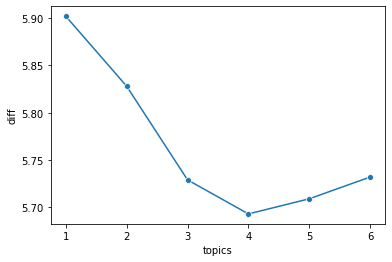

In [15]:
import seaborn as sns

df_fit['diff'] = abs(df_fit.coherence - df_fit.perplexity)
sns.lineplot(x='topics', y='diff', data=df_fit, ci=None, marker='o');

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              id2word=id2word, 
                                              num_topics=6, 
                                              random_state=12345,
                                              chunksize=100, 
                                              passes=5,
                                              per_word_topics=True)

df_topics = df_weather.copy()

num_topics = len(lda_model.get_topics()) # store the number of topics from the last model
for col in range(num_topics): # generate a new column for each topic
  df_topics[f'topic_{col + 1}'] = 0.0

# Store the topic score and dominant topic
for i, words in enumerate(data_ready):
  doc = lda_model[id2word.doc2bow(words)] # generate a corpus for this document set of words

  for j, score in enumerate(doc[0]): # for each document in the corpus
    # Get the topic score and store it in the appropriate column
    df_topics.iat[i, (len(df_topics.columns) - ((num_topics) - score[0]))] = score[1]

df_topics.head(100)

,Date,text,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.000000,0.000000,0.000000,0.420030,0.464677,0.099554
1,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.000000,0.000000,0.047176,0.276601,0.204255,0.465888
2,JAN 14 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.000000,0.000000,0.000000,0.232909,0.411679,0.347309
3,JAN 15 2016,...WINTER WEATHER ADVISORY REMAINS IN EFFECT U...,0.000000,0.000000,0.000000,0.100201,0.450913,0.439242
4,JAN 19 2016,...DENSE FOG ADVISORY IN EFFECT UNTIL 9 AM MST...,0.112267,0.000000,0.000000,0.329181,0.449907,0.102560
...,...,...,...,...,...,...,...,...
95,Jun 15 2019,...FLOOD WATCH IN EFFECT FROM 9 PM MDT THIS EV...,0.000000,0.034917,0.103066,0.240040,0.410201,0.207666
96,Jun 16 2019,...FLOOD WATCH REMAINS IN EFFECT THROUGH MONDA...,0.000000,0.047906,0.078310,0.000000,0.594113,0.268468
97,Jul 22 2019,...HEAT ADVISORY REMAINS IN EFFECT FROM NOON T...,0.977252,0.000000,0.000000,0.000000,0.000000,0.000000
98,Jul 23 2019,...HEAT ADVISORY REMAINS IN EFFECT UNTIL MIDNI...,0.975999,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Create the output DataFrame
df_representative_weather = pd.DataFrame(columns=df_topics.columns)

# Iterate through each topic
for n in range(1, num_topics + 1):
  # Copy the row from the original df with the highest topic score into the new df
  df_representative_weather.loc['topic_' + str(n)] = df_topics.loc[df_topics['topic_' + str(n)].idxmax()]

df_representative_weather

,Date,text,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
topic_1,Aug 15 2020,...EXCESSIVE HEAT WARNING REMAINS IN EFFECT FROM NOON SUNDAY TO MIDNIGHT MDT WEDNESDAY NIGHT... ...,0.979108,0.000000,0.000000,0.000000,0.000000,0.000000
topic_2,Jun 5 2020,...A SEVERE THUNDERSTORM WARNING REMAINS IN EFFECT UNTIL 700 PM MDT FOR SALT LAKE...SOUTHERN DAV...,0.000000,0.607582,0.000000,0.378958,0.000000,0.000000
topic_3,Jul 8 2017,...HEAT ADVISORY REMAINS IN EFFECT UNTIL 10 PM MDT THIS EVENING... * AFFECTED AREA...The downto...,0.091667,0.000000,0.895416,0.000000,0.000000,0.000000
topic_4,APR 22 2016,...WIND ADVISORY REMAINS IN EFFECT UNTIL 10 PM MDT THIS EVENING... * AFFECTED AREA...THE GREAT ...,0.000000,0.000000,0.000000,0.991259,0.000000,0.000000
topic_5,Jan 25 2020,...DENSE FOG ADVISORY IN EFFECT UNTIL 11 AM MST SUNDAY... * WHAT...Visibility less than a quart...,0.000000,0.000000,0.000000,0.000000,0.972147,0.000000
topic_6,Feb 1 2020,...WINTER STORM WATCH REMAINS IN EFFECT FROM SUNDAY EVENING THROUGH MONDAY EVENING... * WHAT......,0.000000,0.000000,0.000000,0.000000,0.000000,0.990125


[(0,
  '0.081*"temperature" + 0.065*"mdt" + 0.042*"heat" + 0.033*"warning" + '
  '0.025*"effect" + 0.024*"hard_freeze" + 0.023*"impact" + 0.022*"midnight" + '
  '0.019*"night" + 0.018*"remain"'),
 (1,
  '0.035*"mdt" + 0.020*"forecast" + 0.019*"indicate" + 0.018*"flash" + '
  '0.018*"mile_marker" + 0.014*"possible" + 0.014*"week" + 0.014*"significant" '
  '+ 0.011*"line_extende" + 0.010*"damage"'),
 (2,
  '0.036*"wind" + 0.034*"rain" + 0.034*"pm" + 0.033*"snow" + 0.030*"blow" + '
  '0.028*"north" + 0.027*"gusty" + 0.022*"cause" + 0.022*"take" + '
  '0.022*"high"'),
 (3,
  '0.084*"wind" + 0.038*"mph" + 0.031*"strong" + 0.027*"pm" + 0.025*"evening" '
  '+ 0.022*"gust" + 0.022*"advisory" + 0.022*"impact" + 0.021*"effect" + '
  '0.020*"mdt"'),
 (4,
  '0.057*"wasatch" + 0.052*"front" + 0.045*"mountain" + 0.039*"morning" + '
  '0.032*"valley" + 0.032*"impact" + 0.031*"visibility" + 0.030*"great" + '
  '0.030*"effect" + 0.027*"desert"'),
 (5,
  '0.059*"snow" + 0.037*"valley" + 0.036*"front" + 

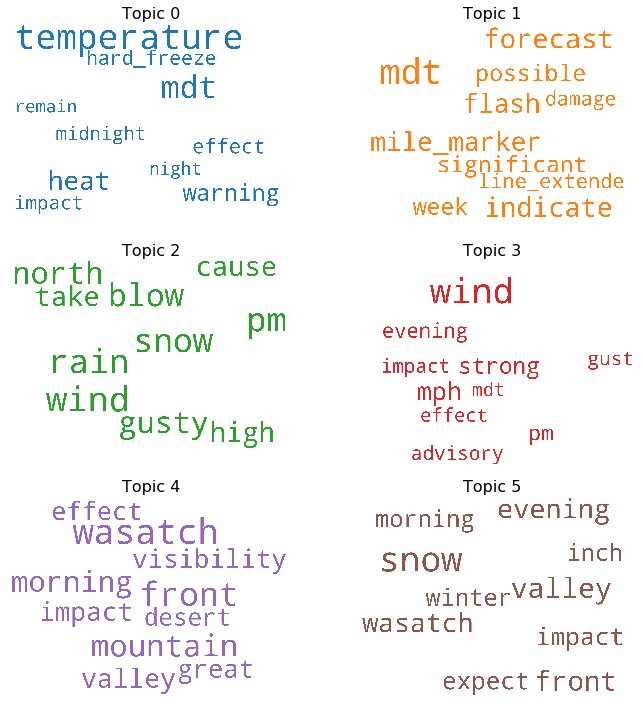

In [18]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
    except:
      continue

pprint(lda_model.print_topics())
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


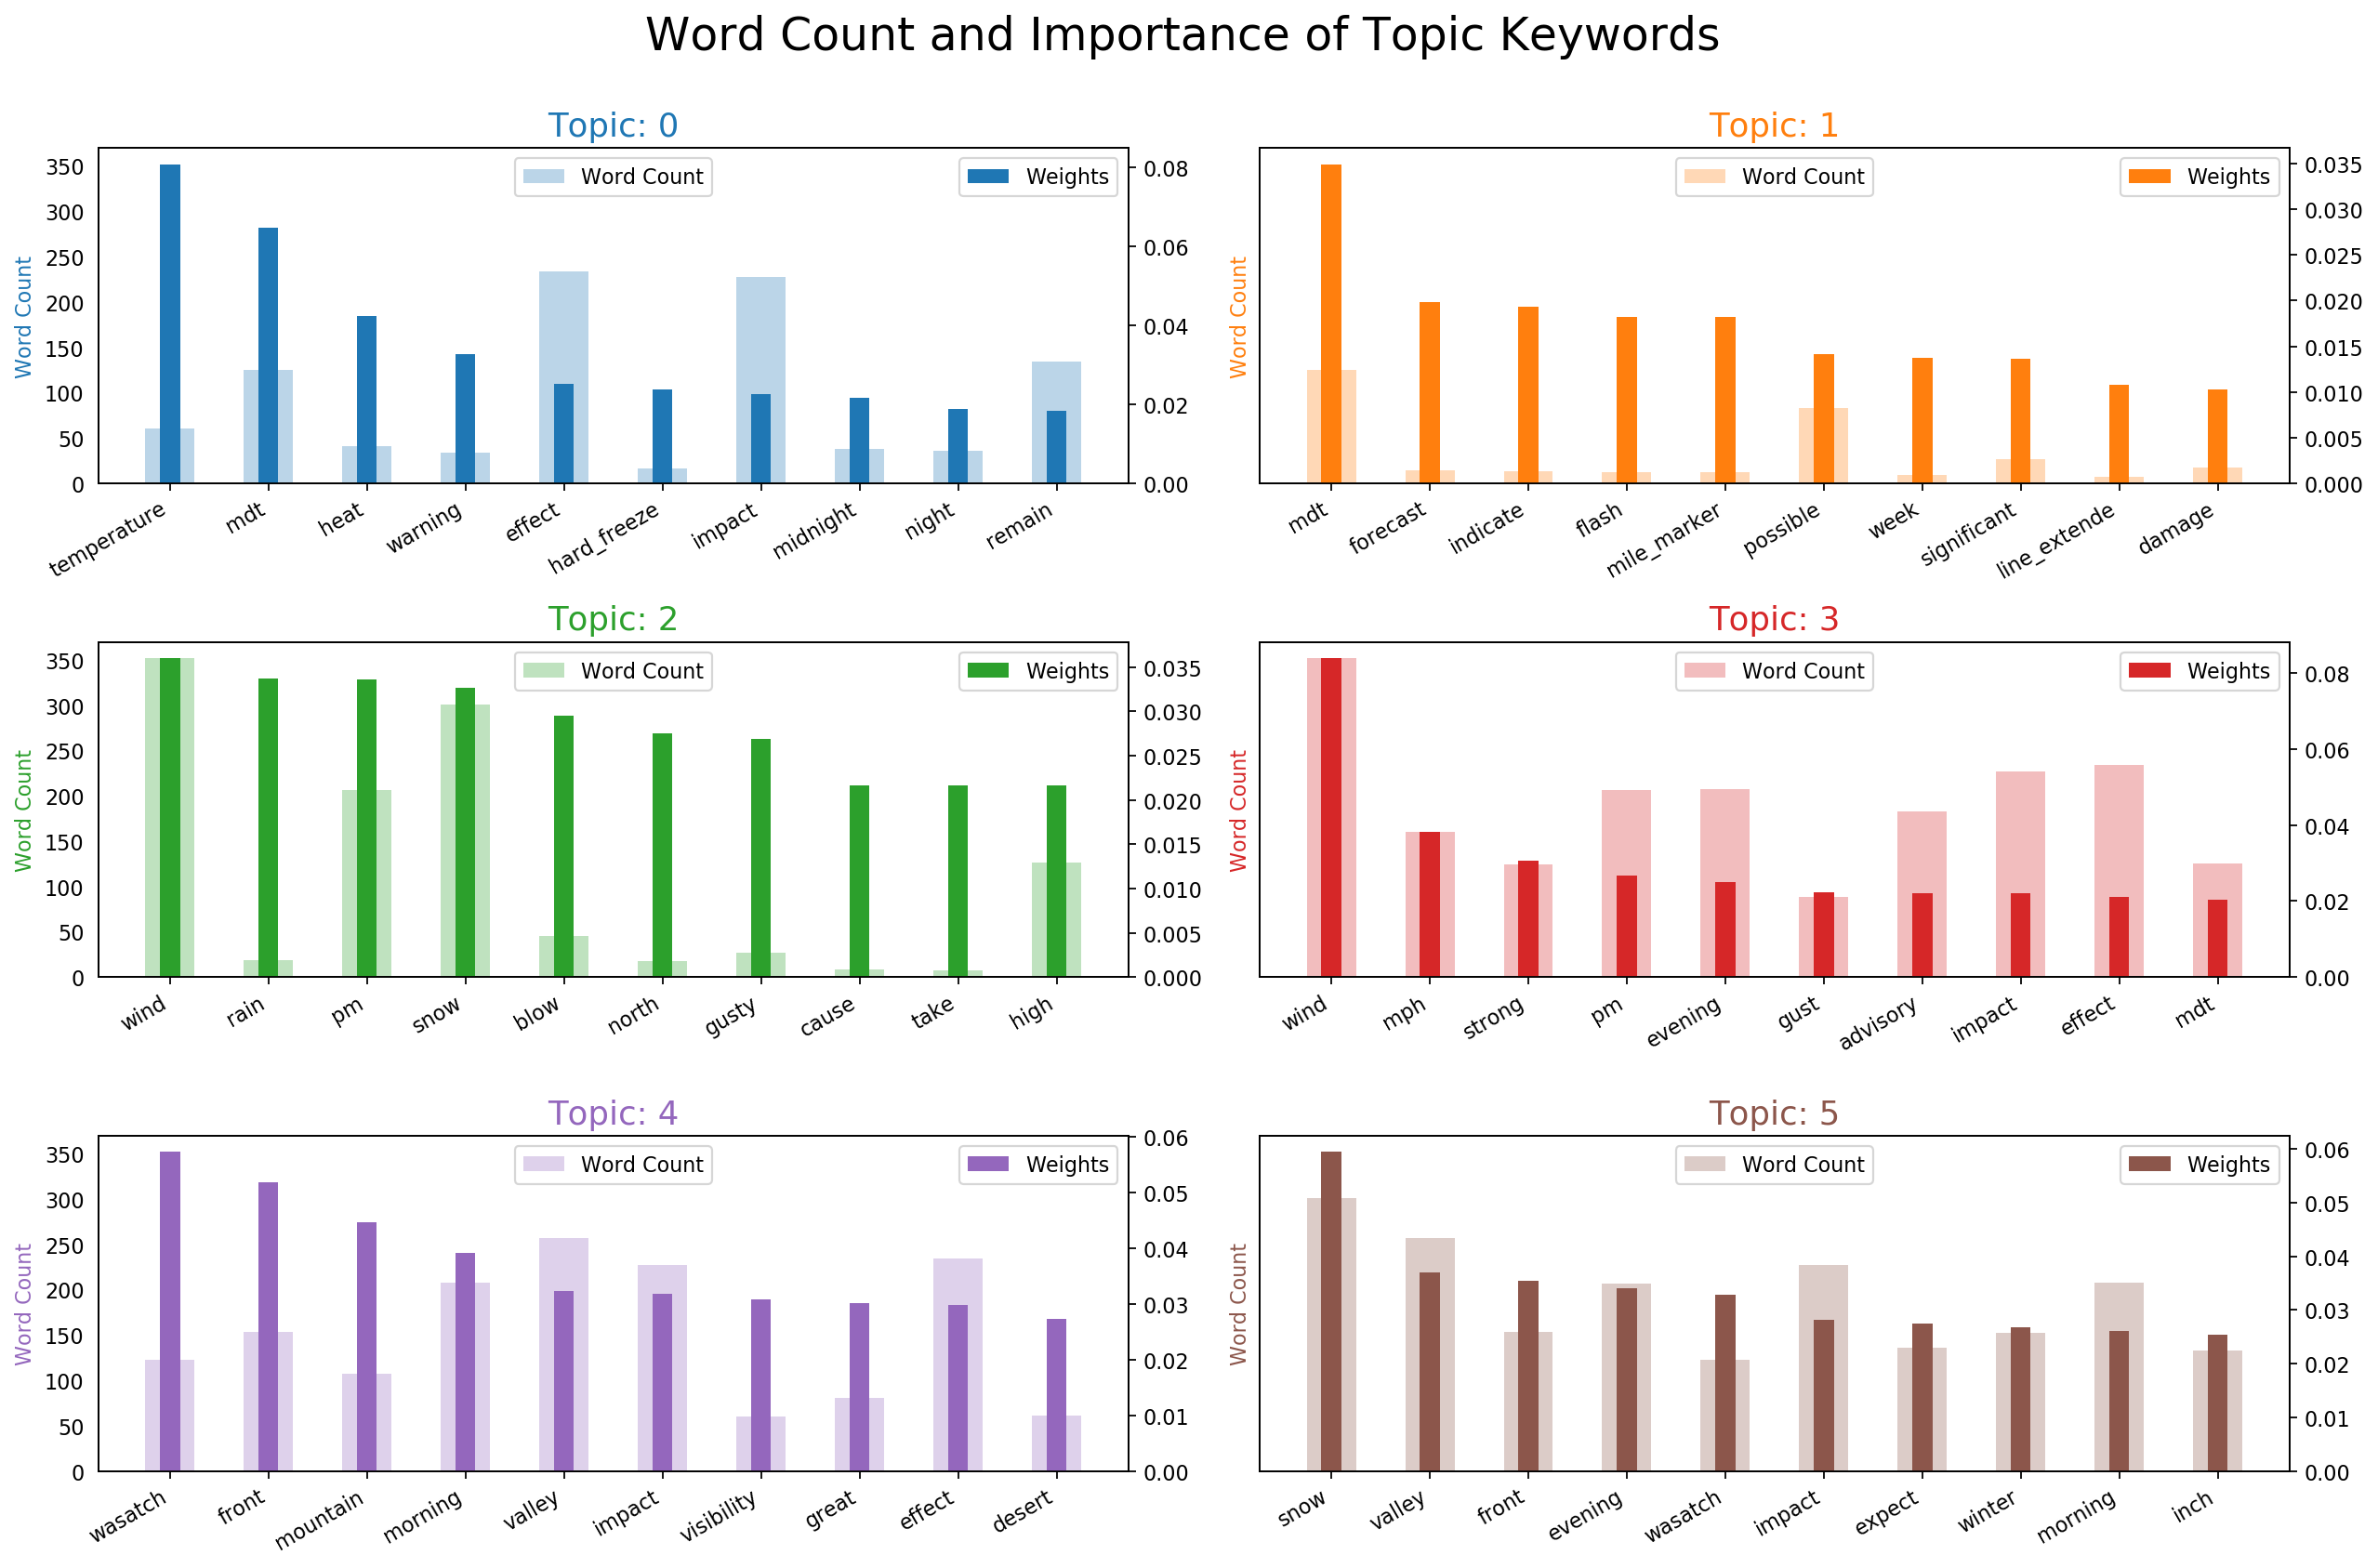

In [19]:
 # Bar chart of word counts for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [20]:
 # Get topic weights and dominant topics
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.001s...
[t-SNE] Computed neighbors for 209 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 0.008091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.618042
[t-SNE] KL divergence after 700 iterations: 0.132929


Loading BokehJS ...

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.048524  0.120676       1        1  35.965244
5     -0.218781  0.003859       2        1  34.185007
4     -0.132914 -0.146105       3        1  10.803212
2      0.019545  0.181355       4        1   7.457887
0      0.090131 -0.150492       5        1   6.203858
1      0.290543 -0.009293       6        1   5.384792, topic_info=            Term        Freq       Total Category  logprob  loglift
147         wind  360.000000  360.000000  Default  30.0000  30.0000
52          snow  235.000000  235.000000  Default  29.0000  29.0000
186          mdt  138.000000  138.000000  Default  28.0000  28.0000
97       wasatch  180.000000  180.000000  Default  27.0000  27.0000
302  temperature   74.000000   74.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
42       include    4.964999   67.566643   Topic6  -4.7057   0.3109
222          dry    3.528980    5.203483   Topic6  -5.0472   2.5333
124   interstate    3.742856   28.268550   Topic6  -4.9883   0.8997
170      warning    3.707035   40.865140   Topic6  -4.9979   0.5215
154         make    3.490553   12.540296   Topic6  -5.0581   1.6427

[341 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
29        2  0.201999    accumulate
29        3  0.605998    accumulate
30        2  0.946951  accumulation
30        3  0.011409  accumulation
30        4  0.034227  accumulation
...     ...       ...           ...
147       4  0.074798          wind
57        2  0.915973        winter
57        3  0.009849        winter
57        4  0.059095        winter
455       5  0.922736          work

[515 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 3, 1, 2])